In [1]:
# Install necessary packages
!pip install scanpy anndata matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0


In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip



In [3]:
sc.settings.verbosity = 3
sc.logging.print_header()



/usr/local/lib/python3.11/dist-packages/session_info2/__init__.py:125: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  and (v := getattr(pkg, "__version__", None))


AttributeError: 'HBox' object has no attribute '_repr_mimebundle_'

scanpy	1.11.3
numpy	2.0.2
pandas	2.2.2
matplotlib	3.10.0
seaborn	0.13.2
----	----
wcwidth	0.2.13
Pygments	2.19.2
pytest	8.4.1
numexpr	2.11.0
dask	2025.5.0
python-dateutil	2.9.0.post0
statsmodels	0.14.5
google-genai	1.27.0
legacy-api-wrap	1.4.1
backcall	0.2.0
sphinxcontrib-jsmath	1.0.1
cloudpickle	3.1.1
sphinxcontrib-serializinghtml	2.0.0
httplib2	0.22.0
dataproc-spark-connect	0.8.3
ipython	7.34.0
anndata	0.12.1
pyarrow	18.1.0
toolz	0.12.1
sphinxcontrib-qthelp	2.0.0
fsspec	2025.3.0
google-auth-oauthlib	1.2.2
setuptools	75.2.0
six	1.17.0
zstandard	0.23.0
pyparsing	3.2.3
typing_extensions	4.14.1
prompt_toolkit	3.0.51
google-cloud-core	2.4.3
importlib_metadata	8.7.0
google-cloud-storage	2.19.0
rapids-dask-dependency	25.6.0
pyzmq	26.2.1
MarkupSafe	3.0.2
xarray	2025.7.1
pytz	2025.2
zipp	3.23.0
google-cloud-spanner	3.56.0
cramjam	2.10.0
protobuf	5.29.5
llvmlite	0.43.0
certifi	2025.7.14 (2025.07.14)
zarr	3.1.0
numba	0.60.0
google-cloud-bigquery-storage	2.32.0
Jinja2	3.1.6
joblib	1.5.1
grpc-goo

KD file exists: True
Control file exists: True
Loading data files with pandas first...
KD data shape: (19096, 996)
Control data shape: (18986, 1253)


<ipython-input-30-f9344cd00798>:50: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata_kd.concatenate(adata_ctrl, batch_key='dataset')


Combined data shape: (2249, 18370)
Calculating QC metrics...


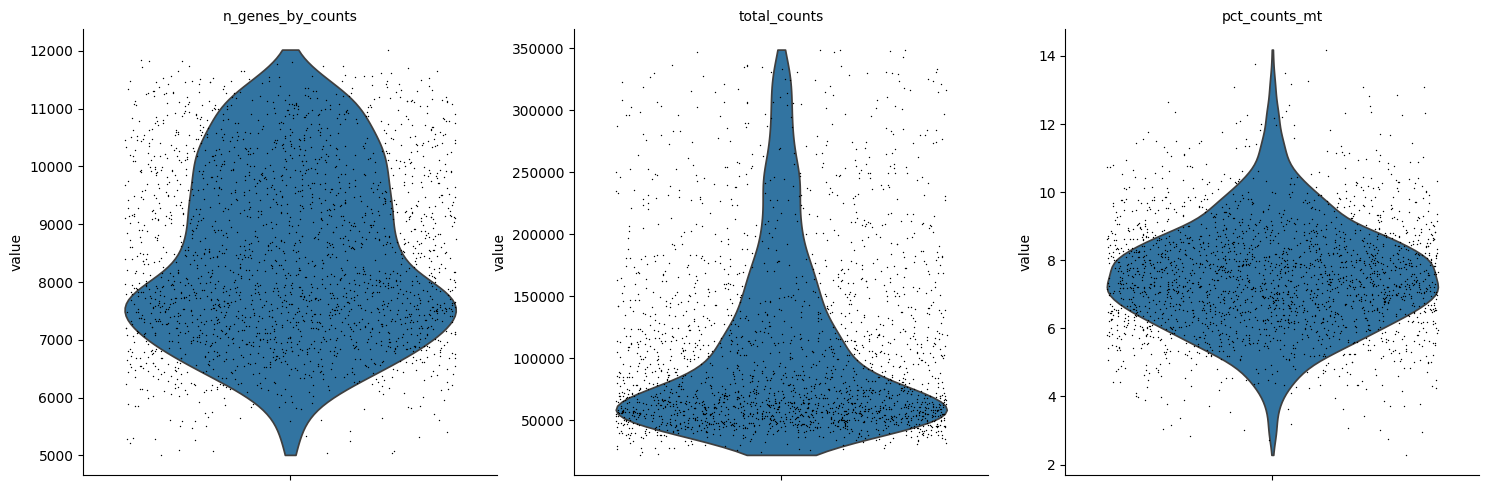

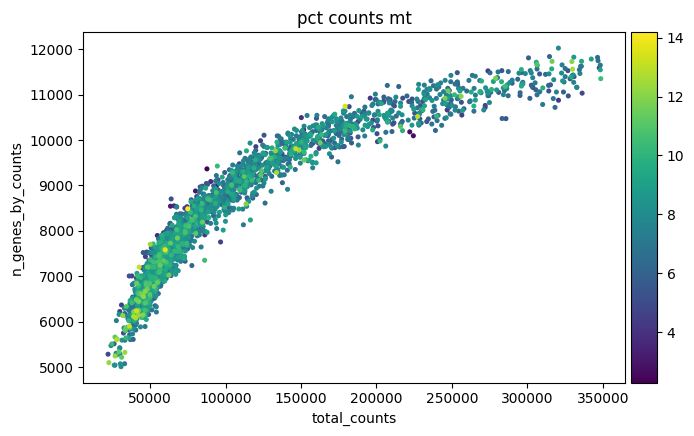

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip

# Set plotting settings
sc.settings.verbosity = 3
sc.logging.print_header()

# Define file paths for the compressed files
kd_file = "/GSM4979213_IMR575-shMYCN_kd_filtered_counts.tsv.gz"
ctrl_file = "/GSM4979214_IMR575-shMYCN_ctrl_filtered_counts.tsv.gz"

# Check if files exist
print(f"KD file exists: {os.path.exists(kd_file)}")
print(f"Control file exists: {os.path.exists(ctrl_file)}")

# 1. First read the files with pandas and then convert to AnnData
print("Loading data files with pandas first...")

# Function to load gzipped TSV file
def load_gzipped_tsv(filename):
    with gzip.open(filename, 'rt') as f:
        return pd.read_csv(f, sep='\t', index_col=0)

try:
    # Load data
    df_kd = load_gzipped_tsv(kd_file)
    df_ctrl = load_gzipped_tsv(ctrl_file)

    print(f"KD data shape: {df_kd.shape}")
    print(f"Control data shape: {df_ctrl.shape}")

    # Convert to AnnData - transpose to get cells x genes
    adata_kd = sc.AnnData(df_kd.T)
    adata_ctrl = sc.AnnData(df_ctrl.T)

    # Add condition information to observations
    adata_kd.obs['condition'] = 'MYCN_knockdown'
    adata_ctrl.obs['condition'] = 'control'

    # Add sample information for batch processing
    adata_kd.obs['sample'] = 'kd'
    adata_ctrl.obs['sample'] = 'ctrl'

    # Merge datasets
    adata_combined = adata_kd.concatenate(adata_ctrl, batch_key='dataset')
    print(f"Combined data shape: {adata_combined.shape}")  # cells × genes

    # Continue with the analysis...
    # 2. Quality control
    print("Calculating QC metrics...")
    # Identify mitochondrial, ribosomal, and hemoglobin genes
    adata_combined.var["mt"] = adata_combined.var_names.str.startswith("MT-")
    adata_combined.var["ribo"] = adata_combined.var_names.str.startswith(("RPS", "RPL"))
    adata_combined.var["hb"] = adata_combined.var_names.str.contains("^HB[^(P)]")

    # Calculate QC metrics
    sc.pp.calculate_qc_metrics(
        adata_combined, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
    )

    # Plot QC metrics
    sc.pl.violin(
        adata_combined,
        ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
        jitter=0.4,
        multi_panel=True
    )

    # Joint visualization of QC metrics
    sc.pl.scatter(adata_combined, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

except Exception as e:
    print(f"Error: {e}")



Normalizing data...
normalizing counts per cell
    finished (0:00:00)
Finding highly variable genes...
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


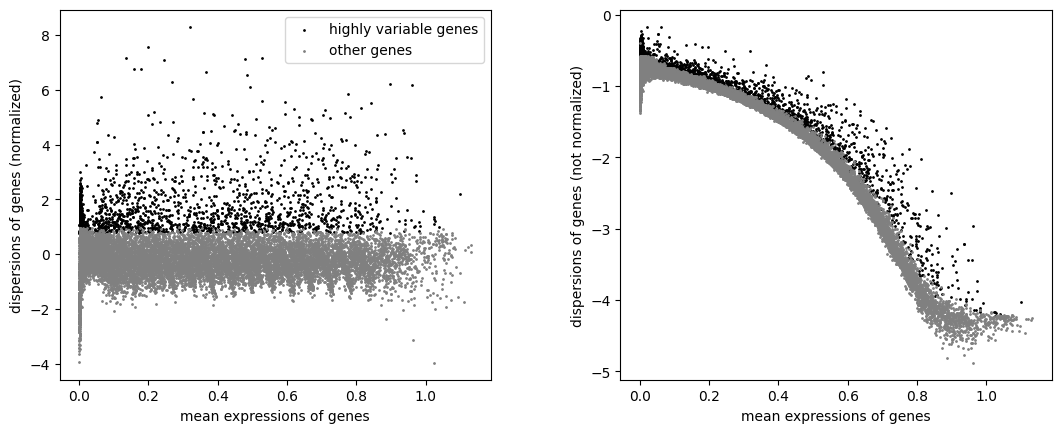

Number of highly variable genes: 2000
Scaling data...


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Running PCA...
computing PCA
    with n_comps=50
    finished (0:00:00)


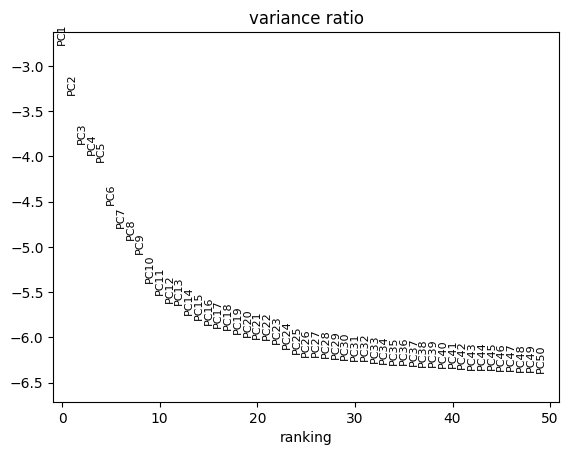

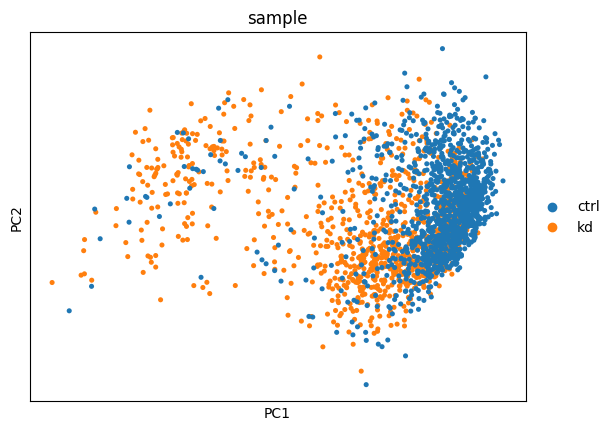

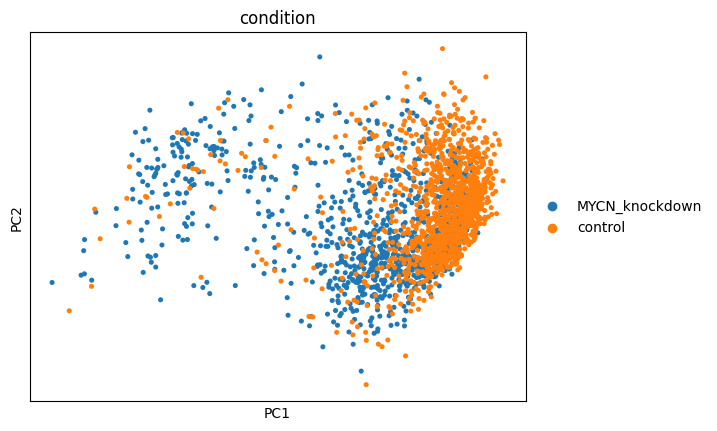

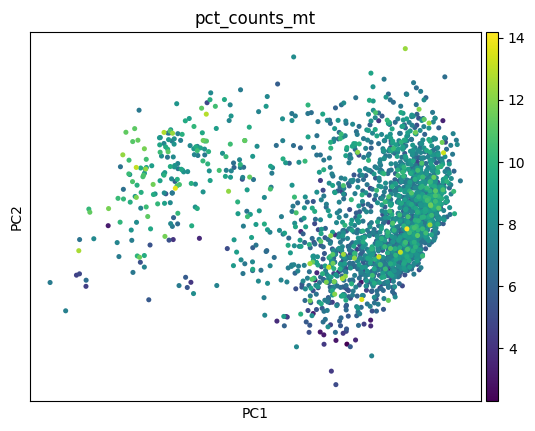

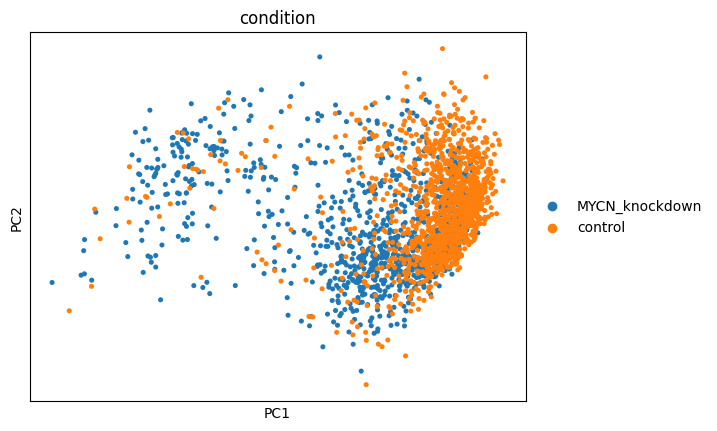

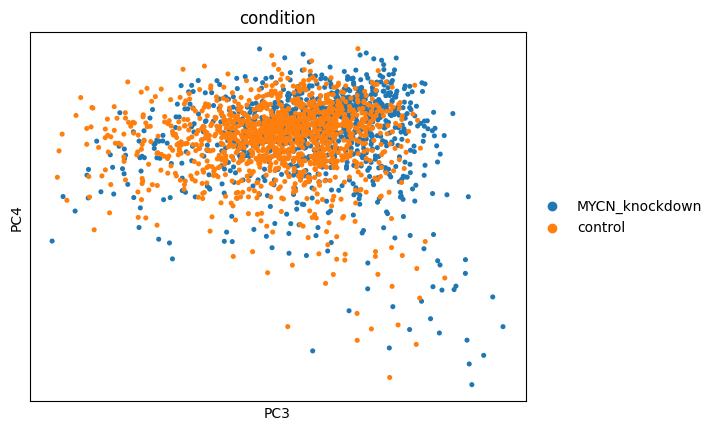

In [ ]:
# 3. Normalization
print("Normalizing data...")
# Save raw counts
adata_combined.layers["counts"] = adata_combined.X.copy()
# Normalize to median counts
sc.pp.normalize_total(adata_combined)
# Log transform
sc.pp.log1p(adata_combined)

# 4. Feature selection
print("Finding highly variable genes...")
sc.pp.highly_variable_genes(adata_combined, n_top_genes=2000, batch_key="sample")
sc.pl.highly_variable_genes(adata_combined)

# Keep only highly variable genes
adata_hvg = adata_combined[:, adata_combined.var.highly_variable]
print(f"Number of highly variable genes: {adata_hvg.shape[1]}")

# 5. Scale data (mean=0, variance=1)
print("Scaling data...")
sc.pp.scale(adata_hvg, max_value=10)

# 6. Dimensionality reduction
print("Running PCA...")
sc.tl.pca(adata_hvg)
sc.pl.pca_variance_ratio(adata_hvg, n_pcs=50, log=True)

# Replace the problematic PCA plotting code with this:
# Plot individual PCAs one at a time

# Plot PCA colored by sample
sc.pl.pca(adata_hvg, color="sample")

# Plot PCA colored by condition
sc.pl.pca(adata_hvg, color="condition")

# Plot PCA colored by mitochondrial content
sc.pl.pca(adata_hvg, color="pct_counts_mt")

#  Specific dimensions, plot them separately
# First dimensions (0,1)
sc.pl.pca(adata_hvg, color="condition", dimensions=(0,1))

# Then dimensions (2,3)
sc.pl.pca(adata_hvg, color="condition", dimensions=(2,3))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.4 MB/s eta 0:00:00
Computing neighborhood graph...
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:37)
Running UMAP...
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


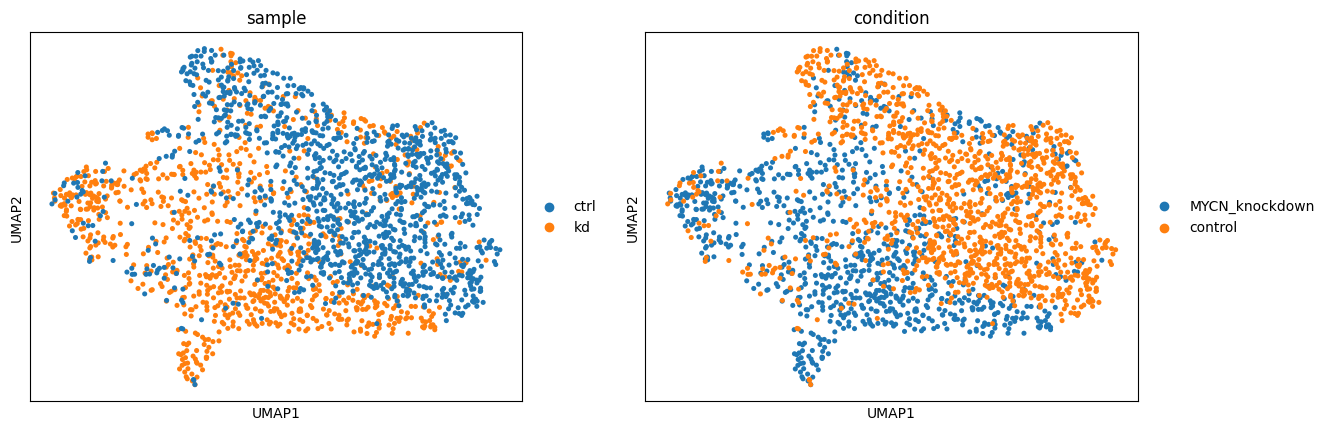

Clustering at different resolutions...
running Leiden clustering


<ipython-input-42-a9c9b4960e0e>:15: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, resolution=res, key_added=f"leiden_res_{res:.2f}")


    finished: found 5 clusters and added
    'leiden_res_0.20', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden_res_0.50', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_res_1.00', the cluster labels (adata.obs, categorical) (0:00:00)
Plotting clusters...


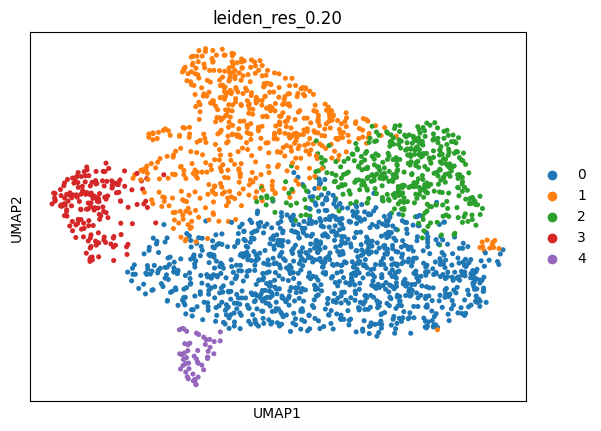

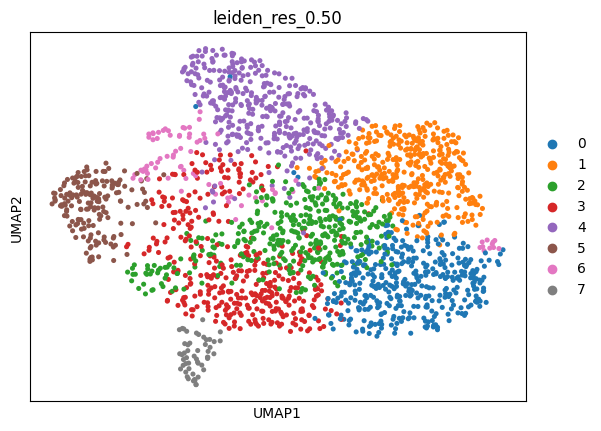

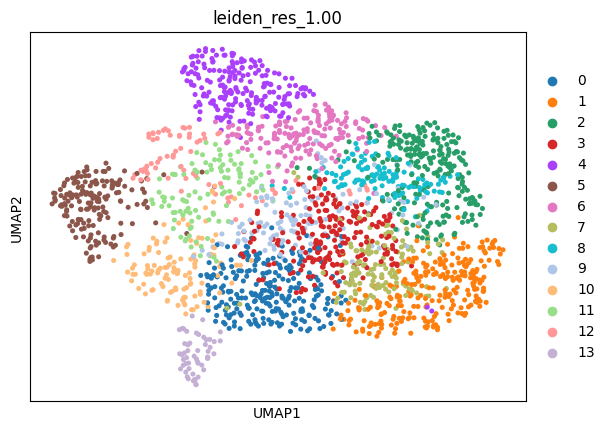

In [ ]:
# Install igraph package
!pip install igraph leidenalg
# 7. Build neighborhood graph
print("Computing neighborhood graph...")
sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=30)

# 8. Run UMAP
print("Running UMAP...")
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=["sample", "condition"])

# 9. Clustering - try different resolutions
print("Clustering at different resolutions...")
for res in [0.2, 0.5, 1.0]:
    sc.tl.leiden(adata_hvg, resolution=res, key_added=f"leiden_res_{res:.2f}")

# Plot clusters from different resolutions
print("Plotting clusters...")
sc.pl.umap(adata_hvg, color=["leiden_res_0.20"])
sc.pl.umap(adata_hvg, color=["leiden_res_0.50"])
sc.pl.umap(adata_hvg, color=["leiden_res_1.00"])

Finding marker genes for clusters...
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:18)


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: 

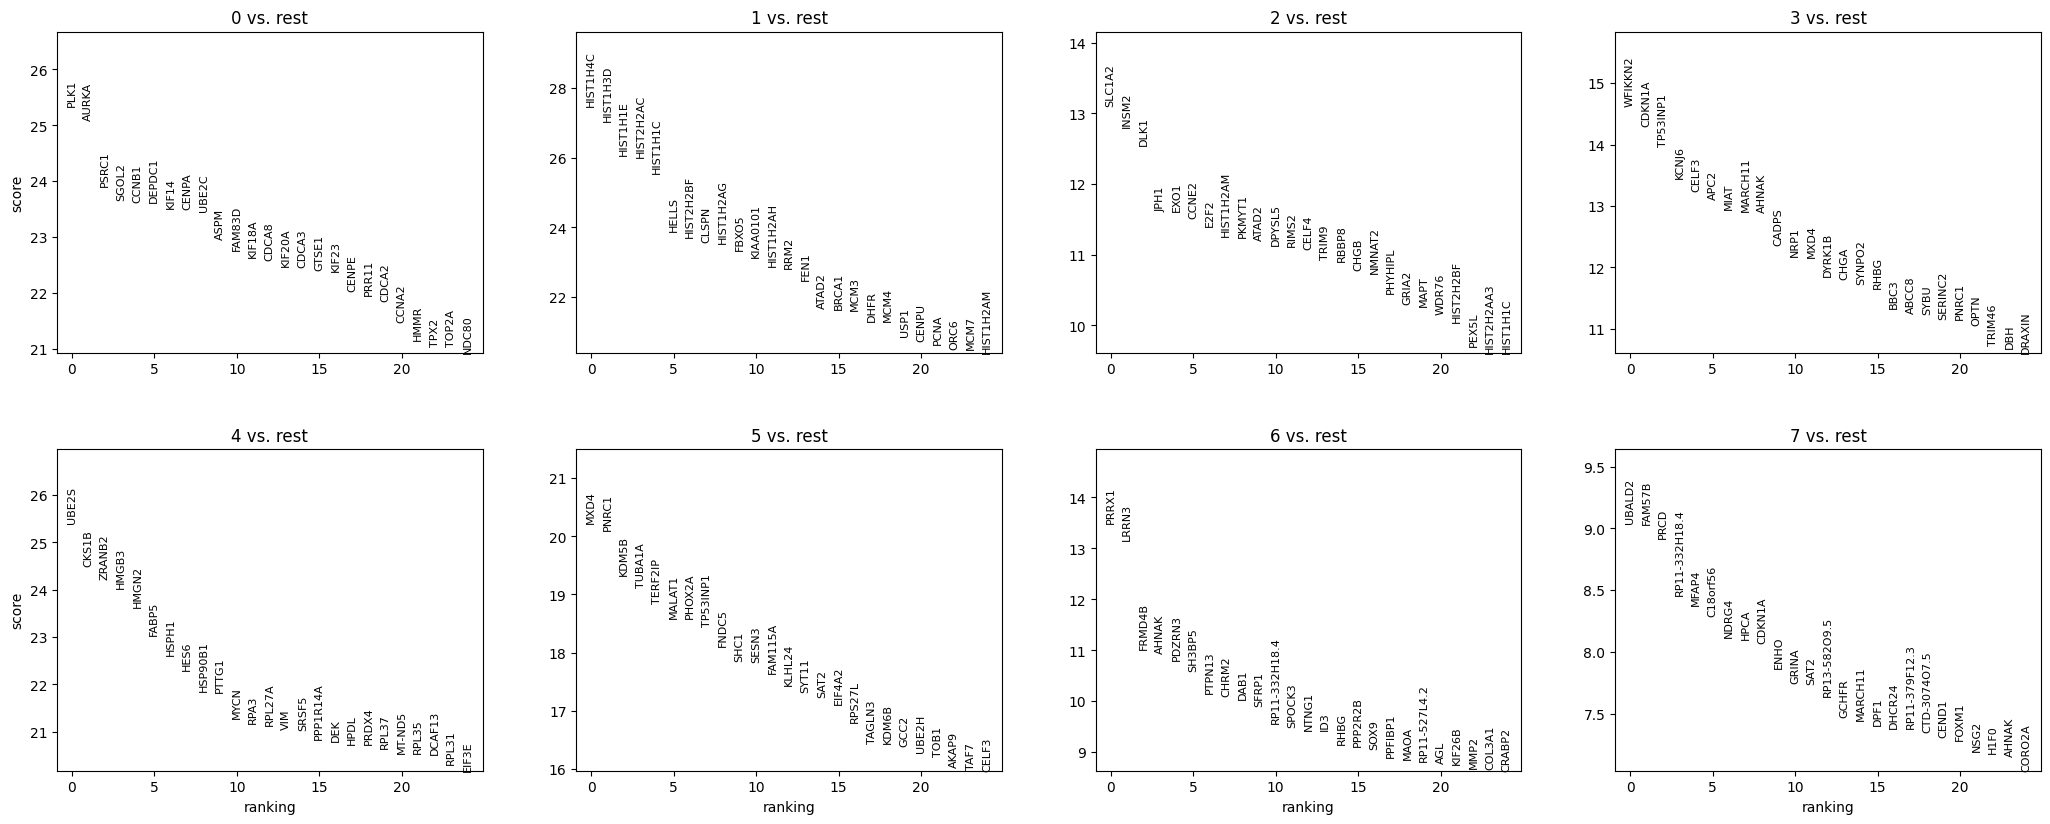

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_res_0.50']`


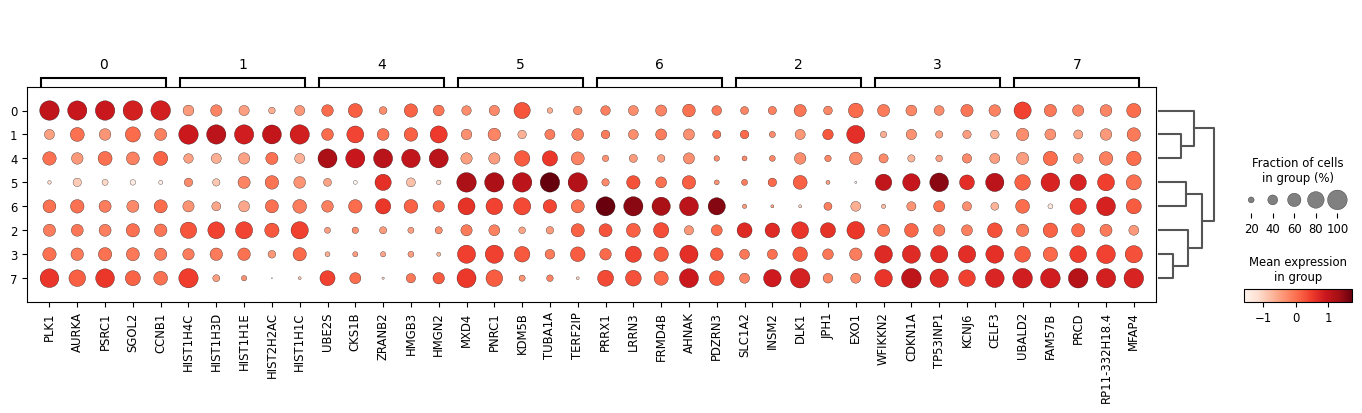

Analyzing neuroblastoma-related genes...
Available neuroblastoma genes: ['MYCN', 'PHOX2B', 'DBH', 'ASCL1', 'CCND1', 'CDKN1C']
Plotting MYCN expression...


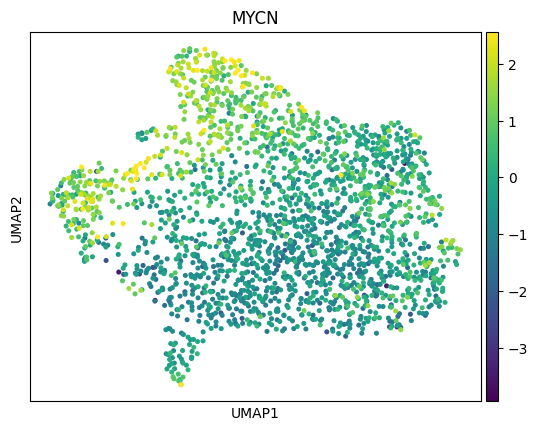

Plotting PHOX2B expression...


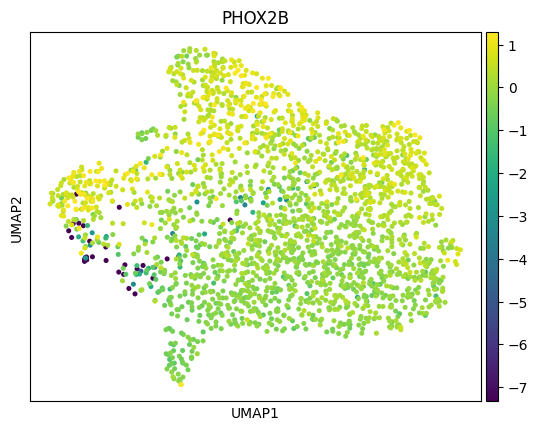

Plotting DBH expression...


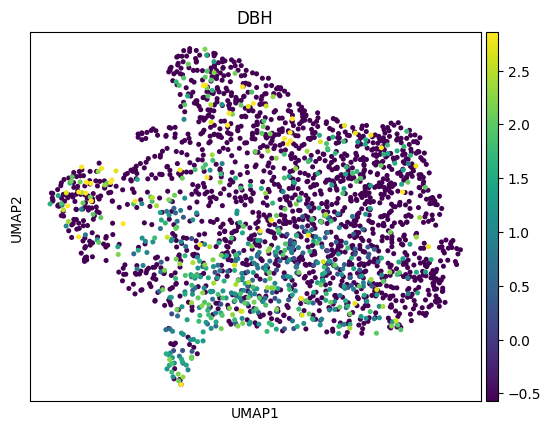

Plotting ASCL1 expression...


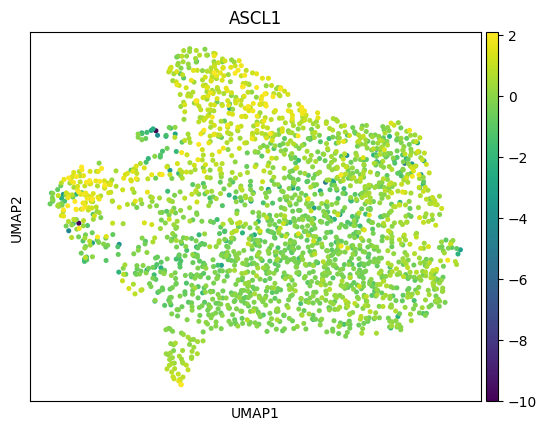

Plotting CCND1 expression...


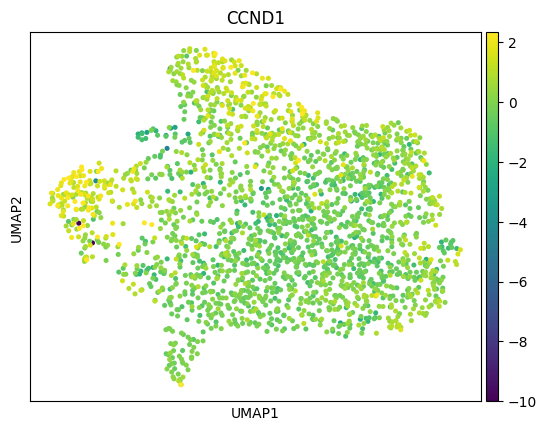

Plotting CDKN1C expression...


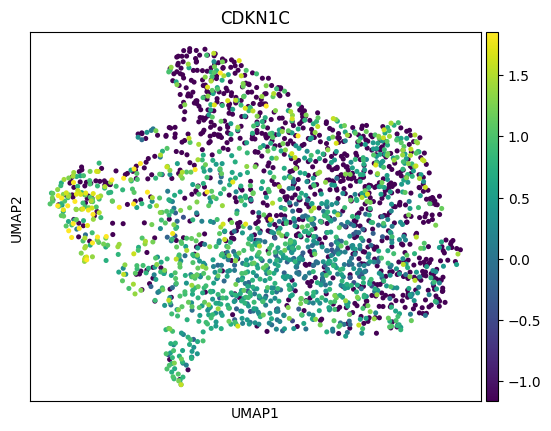

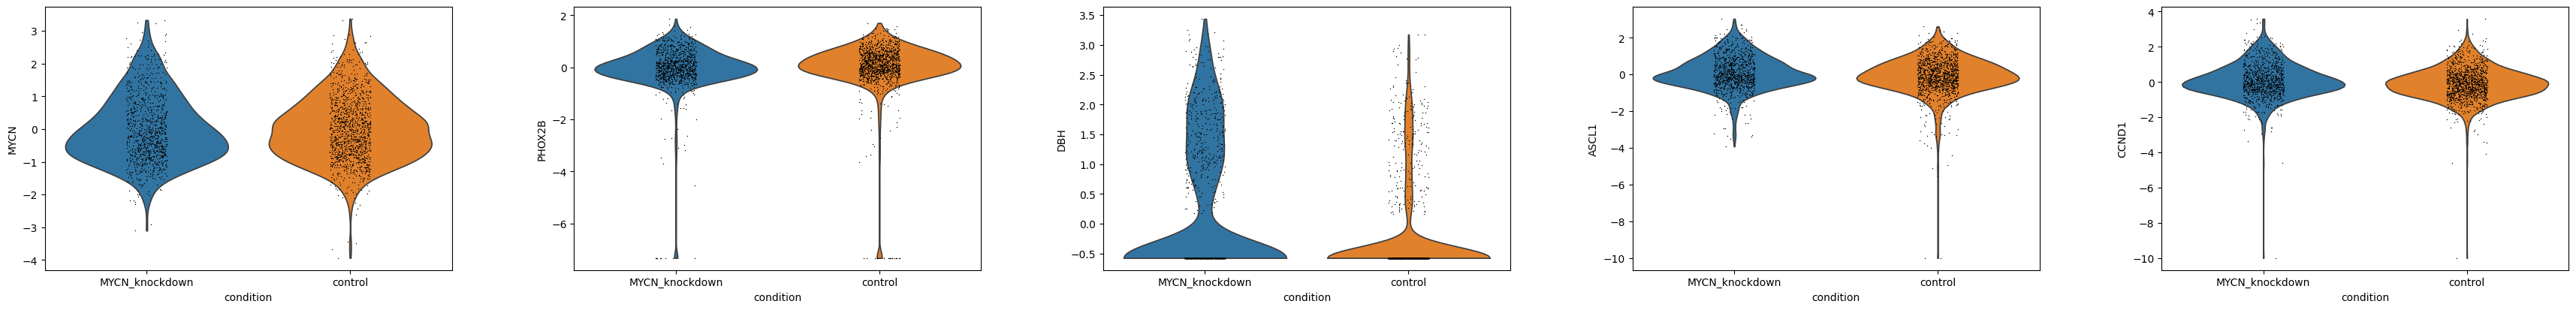

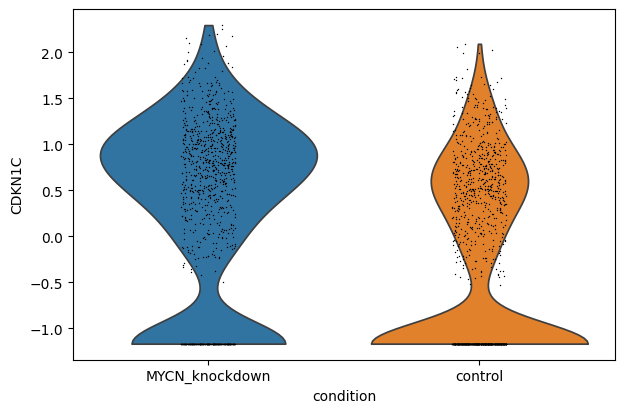

In [ ]:

# 10. Identify marker genes
print("Finding marker genes for clusters...")
# Choose the clustering resolution that looks most appropriate
sc.tl.rank_genes_groups(adata_hvg, groupby="leiden_res_0.50", method="wilcoxon")
sc.pl.rank_genes_groups(adata_hvg, n_genes=25, sharey=False)

# Dotplot visualization
try:
    sc.pl.rank_genes_groups_dotplot(
        adata_hvg, groupby="leiden_res_0.50", n_genes=5
    )
except Exception as e:
    print(f"Dotplot error: {e}")
    # Alternative visualization
    sc.pl.rank_genes_groups_heatmap(
        adata_hvg, groupby="leiden_res_0.50", n_genes=5
    )

# 11. Analyze genes relevant to neuroblastoma
print("Analyzing neuroblastoma-related genes...")
genes_of_interest = ['MYCN', 'PHOX2B', 'HAND2', 'TH', 'DBH', 'ASCL1',
                    'SOX11', 'TFAP2B', 'ALK', 'CCND1', 'CDKN1C']

# Check which of these genes are in the dataset
available_genes = [gene for gene in genes_of_interest if gene in adata_hvg.var_names]
print(f"Available neuroblastoma genes: {available_genes}")

# Plot expression of these genes - one by one
if available_genes:
    for gene in available_genes:
        try:
            print(f"Plotting {gene} expression...")
            sc.pl.umap(adata_hvg, color=[gene], vmax='p99')
        except Exception as e:
            print(f"Error plotting {gene}: {e}")

    # Try violin plots
    try:
        sc.pl.violin(adata_hvg, available_genes[:5], groupby="condition")
        if len(available_genes) > 5:
            sc.pl.violin(adata_hvg, available_genes[5:], groupby="condition")
    except Exception as e:
        print(f"Violin plot error: {e}")
else:
    print("None of the neuroblastoma genes of interest are in the dataset.")

Analyzing differential expression between conditions...
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


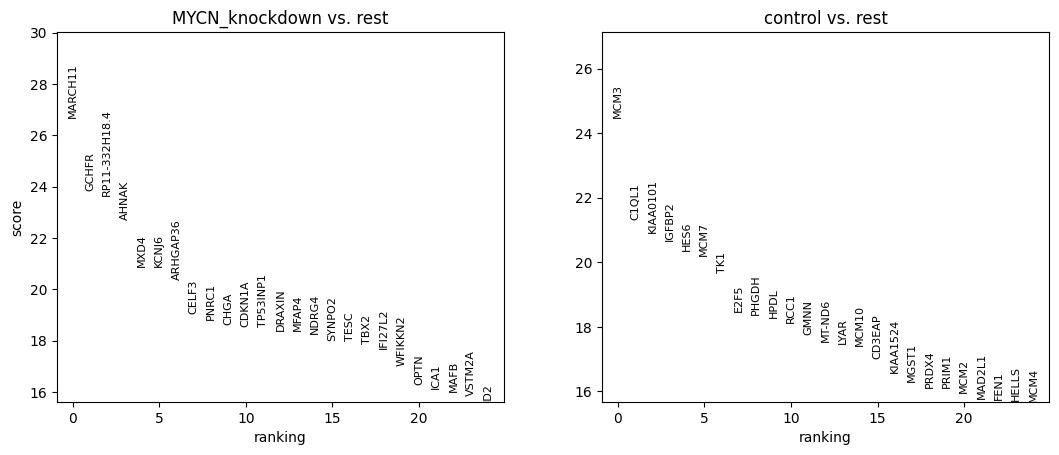

Saving analysis results...
Analysis complete!


In [ ]:
# 12. Compare MYCN knockdown vs control
print("Analyzing differential expression between conditions...")
sc.tl.rank_genes_groups(adata_hvg, groupby="condition", method="wilcoxon")
sc.pl.rank_genes_groups(adata_hvg, n_genes=25, sharey=False)

# 13. Save the results
print("Saving analysis results...")
adata_hvg.write('neuroblastoma_analysis_results.h5ad')

print("Analysis complete!")